<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Whitening</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.5</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

There might be machine learning algorithms that require uncorrelated data. Then, using a linear transformation, it is possible to transform the data such that there is no correlation between the new features. Such a transformation is called whitening because it changes the input vector into a white noise vector. 

In this lab exercise, three different linear transformations will be e explored more extensively that will provide a new set of variables with a covariance matrix equal to the identity matrix (i.e., the features will not correlate to each other):
- ZCA (Mahalanobis) whitening
- PCA whitening
- Cholesky whitening
 
The following datasets are used in this lab exercise:
- "Digits" dataset included in the dataset of the scikit-learn library.
- "BodyFat" dataset from https://rdrr.io/cran/isdals/man/bodyfat.html
- "Iris" dataset included in the dataset of the scikit-learn library.
- In creating the generic whitening function the following R package have been used: *Whitening and High-Dimensional Canonical Correlation Analysis* (see at http://www.strimmerlab.org/software/whitening/)

### Table of contents
1. [Preparation](#Preparation)
2. [ZCA whitening](#ZCA)
2. [PCA whitening](#PCA)
4. [Cholesky whitening](#CHOL)
5. [ Comparison of whitening methods](#Comp)

## 1. Preparation <a name="Preparation"></a>

As a first step, we import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy.linalg import eig, eigh, inv, cholesky
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import os
%matplotlib inline

Then in the following sections the 3 main whitening methods will be checked.

## 2. ZCA (Mahalanobis) whitening <a name="ZCA"></a>

In many applications, like computer vision and image recognition, it is desirable to remove correlations with minimal additional adjustment, so the transformed variable $\mathbf z$ remains as similar as possible to the original vector $\mathbf x$. In other words, after the whitening transformation, the data still preserves the spatial arrangements of the initial input. i.e., the image after the whitening most resembles the input image in a least-squares sense.

For this purpose, we will use the handwritten digit dataset included in *scikit-learn* library.

As a first step, let's load the "Digits" dataset already included in the scikit-learn library. Then convert to an input vector $\mathbf X$.

In [2]:
digits = datasets.load_digits()
N,D,_=digits.images.shape
X=digits.images
X=np.reshape(X,(N,D*D))
print("Number of observations in the dataset is {}, while the image size is {} x {}".format(N,D,D))
print("Size of the input vector is {} x {}".format(X.shape[0],X.shape[1]))
print("Min/max values of X:",(np.min(X),np.max(X)))
X

Number of observations in the dataset is 1797, while the image size is 8 x 8
Size of the input vector is 1797 x 64
Min/max values of X: (0.0, 16.0)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

The dataset consists of 1797 observations, each observation representing the 8x8 pixel image of a handwritten image. Because each pixel is a feature, then there are 64 features in total. Each pixel is an integer value between 0 and 16. A pixel of 0 represents a black pixel, while a pixel of 16 a white pixel. Any number between them are different shades of gray (i.e., the lower the number the darker the gray, the higher the number the lighter the gray).

**Note:** *For a visualization of the above transformation, check the "Case Study: Handwritten Digits Recognition" in chapter **6. Logistic Regression** from the book.*

Next, define a function for the ZCA transformation matrix that can be used to create the whitened data. This function will get an input matrix and will return a transformation matrix. The ZCA transformation matrix - denoted with $\mathbf W_\text{ZCA}$ in the book - is the square root of the inverse of the covariance matrix. The fastest way to calculate the ZCA transformation matrix is to use the Singular Value Decomposition (SVD) from *NumPy* library.

**Note:** *For more information on the ZCA transformation, respective for the geometric interpretation of the spectral decomposition and SVD, see the "Whitening" subsection of the book.*

In [3]:
def Wzca_matrix(X):
    Sigma=np.cov(X,rowvar=False,ddof=1)   # Calculate the covariance matrix
    U,s,V = np.linalg.svd(Sigma)          # use the singular value decomposition
    S=np.diag(1.0/np.sqrt(s.clip(1e-6)))  # take the square root of the invers of the singular values
    return U@S@U.T                        # Return the transformation

With the ZCA transformation matrix, you can obtain the whitened data by applying the linear transformation (i.e., using matrix multiplication).

In [4]:
Wzca=Wzca_matrix(X)
Z=X@Wzca
newimages=np.reshape(Z,(N,D,D))

Now, let's show the original and whitened data for the first ten observations, which represents the digits from 0 to 9. These digits are pictures of handwritten digits, so it should be easy to recognize them.

Then, transform the data using ZCA whitening, and show the first ten observations on the same plot as a subplot. In this way, we will have two subplots representing the group of the original ten digits, respective the group of the transformed ten digits. Then within each subplot, there are ten subplots, each representing the image of one digit (original, respective whitened).

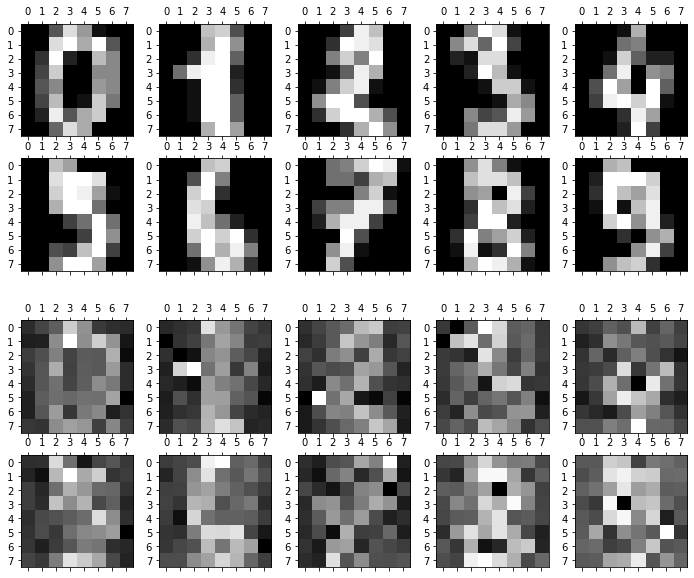

In [5]:
fig = plt.figure(figsize=(12, 10))
outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2,figure=fig)

upper=outer[0].subgridspec(2, 5)

for i in range(5):
    ax = fig.add_subplot(upper[0,i])
    ax.matshow(digits.images[i], cmap=plt.cm.gray)
for i in range(5):
    ax = fig.add_subplot(upper[1,i])
    ax.matshow(digits.images[5+i], cmap=plt.cm.gray)

lower=outer[1].subgridspec(2, 5)
for i in range(5):
    ax = fig.add_subplot(lower[0,i])
    ax.matshow(newimages[i], cmap=plt.cm.gray)
for i in range(5):
    ax = fig.add_subplot(lower[1,i])
    ax.matshow(newimages[5+i], cmap=plt.cm.gray)
plt.savefig('images\\ZCAwhitening.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()

As you can observe, for some digits, even the whitened data slightly resembles a handwritten digit.

Now, let's check if the transformed data is whitened, i.e., the covariance matrix of the whitened data is equal to the identity matrix.

In [6]:
SigmaZ=np.cov(Z,rowvar=False,ddof=1)
SigmaZ.clip(1e-9)

array([[1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e+00, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e+00, ..., 1.e-09, 1.e-09, 1.e-09],
       ...,
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e+00, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e+00, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e+00]])

Although at first sight seems to be reasonable, one should observe that the first element of the diagonal is zero, instead of being 1, as we expected.

Let's find out the reason for this. First, print out the sum of the difference between the elements of the covariance matrix and the identity matrix. Next, print out the sum of the diagonal elements, which should be equal to the number of features (i.e., 64). 

In [7]:
print("Total difference from identity matrix:",np.sum(SigmaZ-np.eye(SigmaZ.shape[0],SigmaZ.shape[1])))
print("Sum of diagonal elements of the covariance of whitened data:",np.sum(np.diag(SigmaZ)))

Total difference from identity matrix: -2.999999999983804
Sum of diagonal elements of the covariance of whitened data: 61.00000000000259


Thus, we can conclude that off-diagonal elements are all zero, but instead of having all ones in the main diagonal, three of them are zero. To understand the root cause of this, let's check the covariance of the original data.

In [8]:
Sigma=np.cov(X,rowvar=False,ddof=1)
print("Sum of input variables with zero variance:",np.sum(np.diagonal(Sigma)==0))

Sum of input variables with zero variance: 3


As we can see, there are three input variables (three pixels in the images) that do not vary at all (i.e., the value is exactly the same for all observations). So, this is the reason that the whitened data also has three pixels with zero variance.

For the above reasons, the covariance matrix is singular, and the inverse of it cannot be calculated.

Let's check that the mean of the whitened data is equal to the transformed mean of the original data (i.e., we will apply the same transformation matrix to the mean of the original data).

In [9]:
mu_=X.mean(axis=0)[:,np.newaxis]
muZ_=Z.mean(axis=0)[:,np.newaxis]
np.sum(Wzca@mu_-muZ_)

-1.2738074484098906e-14

And yes, they are equal aside from the rounding error.

## 3. PCA whitening <a name="PCA"></a>

Another frequent aim in whitening is the generation of new uncorrelated variables such that the first few components (features) in the whitened data represent as much as possible the variation present in the all original variables. This kind of whitening is very useful for dimension reduction and data compression, and it is called PCA whitening, where PCA stands for Principal Components Analysis. 

Next, define a function for the PCA transformation matrix that can be used to create the whitened data. This function will get an input matrix and will return a transformation matrix. The PCA transformation matrix can be obtained by multiplying the matrix of eigenvectors with the matrix of the square root of the inverse of the eigenvalues. 

**Note:** *For more information on the PCA transformation, respective how relates to the ZCA transformation, see the "Whitening" subsection of the book.*

In [10]:
def Wpca_matrix(X):
    N,D=X.shape
    Sigma=np.cov(X,rowvar=False,ddof=1)
    lambda_,P=eigh(Sigma)             # Create the spectral decomposition 
    Lambda=np.eye(D,D)*lambda_
    P=P@np.diag(np.sign(np.diag(P)))  # Adjust the sign of the eigenvectors
    return P@np.sqrt(inv(Lambda))     # Return the transformation

Now, let's take another dataset - called "BodyFat" - which contains information on body fat, triceps skinfold thickness, thigh circumference, and mid-arm circumference for twenty healthy females aged 20 to 34.

As a first step, let's load the "BodyFat" from the dataset of *scikit-learn* dataset, which has only three input variables.

In [11]:
dataFat = pd.read_csv(os.path.join('data','bodyfat.csv'),sep=',')
dataFat

,Nr,Fat,Triceps,Thigh,Midarm
0,1,11.9,19.5,43.1,29.1
1,2,22.8,24.7,49.8,28.2
2,3,18.7,30.7,51.9,37.0
3,4,20.1,29.8,54.3,31.1
4,5,12.9,19.1,42.2,30.9
5,6,21.7,25.6,53.9,23.7
6,7,27.1,31.4,58.5,27.6
7,8,25.4,27.9,52.1,30.6
8,9,21.3,22.1,49.9,23.2
9,10,19.3,25.5,53.5,24.8


Let's print out the correlation matrix.

In [12]:
dataFat.drop(columns=['Nr']).corr()

,Fat,Triceps,Thigh,Midarm
Fat,1.000000,0.843265,0.878090,0.142444
Triceps,0.843265,1.000000,0.923843,0.457777
Thigh,0.878090,0.923843,1.000000,0.084667
Midarm,0.142444,0.457777,0.084667,1.000000


The PearsonPearson correlation coefficients are very high between the output variable and the first two input variables (i.e., between fat and triceps, respectively between fat and thigh), but is low between the output variable and the last input variable (i.e., between fat and midarm). We may also observe that the correlation coefficient is extremely high between the input variables triceps and thigh and moderate between triceps and midarm. This might suggest a multicollinearity problem.

Thus, check the multicollinearity using the variance inflation factors (VIF). For this reason, we will create first the design matrix.

In [13]:
X=np.array(dataFat[["Triceps","Thigh","Midarm"]])
N,D=X.shape
y_=np.array(dataFat['Fat'])[:,np.newaxis]
Xdot=np.insert(X,0,np.ones(N),axis=1)
Xdot

array([[ 1. , 19.5, 43.1, 29.1],
       [ 1. , 24.7, 49.8, 28.2],
       [ 1. , 30.7, 51.9, 37. ],
       [ 1. , 29.8, 54.3, 31.1],
       [ 1. , 19.1, 42.2, 30.9],
       [ 1. , 25.6, 53.9, 23.7],
       [ 1. , 31.4, 58.5, 27.6],
       [ 1. , 27.9, 52.1, 30.6],
       [ 1. , 22.1, 49.9, 23.2],
       [ 1. , 25.5, 53.5, 24.8],
       [ 1. , 31.1, 56.6, 30. ],
       [ 1. , 30.4, 56.7, 28.3],
       [ 1. , 18.7, 46.5, 23. ],
       [ 1. , 19.7, 44.2, 28.6],
       [ 1. , 14.6, 42.7, 21.3],
       [ 1. , 29.5, 54.4, 30.1],
       [ 1. , 27.7, 55.3, 25.7],
       [ 1. , 30.2, 58.6, 24.6],
       [ 1. , 22.7, 48.2, 27.1],
       [ 1. , 25.2, 51. , 27.5]])

Then calculate the variance inflation factors using the *statsmodels* library.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(variance_inflation_factor(Xdot,1))
print(variance_inflation_factor(Xdot,2))
print(variance_inflation_factor(Xdot,3))

708.8429141727062
564.3433857198089
104.606005008185


The VIF values are extremely high, so we have a serious multicollinearity issue.

Let's visualize the observations in a 3D scatter plot.

**Note:** *The 3D plot will open in a new window where you can rotate the plot to see from a different angle. The execution of code will not continue until you close the window.*

In [15]:
%matplotlib qt

fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2],c='r')
ax1.set_xlabel('Triceps',fontsize=14)
ax1.set_ylabel('Thigh',fontsize=14)
ax1.set_zlabel('Midarm',fontsize=14)
ax1.set_title("Original 'bodyfat' dataset",fontsize=16)
ax1.view_init(elev=45., azim=-15)
for i in range(N):
    ax1.plot([X.mean(axis=0)[0],X[i,0]],[X.mean(axis=0)[1],X[i,1]],[X.mean(axis=0)[2],X[i,2]],\
            lw=1,c='k')
plt.show(block=True)

As can be seen on the 3D scatter plot, all the observations are almost residing on a plain. This is clearly visible after you slightly rotate the plot using your mouse.

Now, apply the PCA whitening to the BodyFat data.

In [16]:
Sigma=np.cov(X,rowvar=False,ddof=1)
lambda_,P=eigh(Sigma)
Lambda=np.eye(D,D)*lambda_
Wpca=P@np.sqrt(inv(Lambda))
Xp=X@Wpca

Let's visualize the transformed observations in a 3D scatter plot.

**Note:** *The 3D plot will open in a new window where you can rotate the plot to see from a different angle. The execution of code will not continue until you close the window.*.

In [17]:
%matplotlib qt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xp[:,0], Xp[:,1], Xp[:,2],c='r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("PCA whitened 'bodyfat' dataset")
ax.view_init(elev=45., azim=-15)
for i in range(N):
    ax.plot([Xp.mean(axis=0)[0],Xp[i,0]],[Xp.mean(axis=0)[1],Xp[i,1]],[Xp.mean(axis=0)[2],Xp[i,2]],\
           c='k',lw=1)
plt.show(block=True)

Now, the observations are scattered in the 3D space and not residing anymore on a plain.

We may assume that there is no multicollinearity problem after whitening.

In [18]:
Xpdot=np.insert(Xp,0,np.ones(N),axis=1)
print(variance_inflation_factor(Xpdot,1))
print(variance_inflation_factor(Xpdot,2))
print(variance_inflation_factor(Xpdot,3))

1.000000000000006
1.0
1.0000000000000004


And yes, the multicollinearity issue is solved! All the VIF values equal to one, meaning that there are no correlations at all between the features.

The same result shall be obtained for the covariance matrix of the whitened data.

In [19]:
Spca=np.cov(Xp,rowvar=False,ddof=1)
Spca

array([[ 1.00000000e+00, -7.18090886e-15, -4.55775768e-15],
       [-7.18090886e-15,  1.00000000e+00, -4.20716094e-16],
       [-4.55775768e-15, -4.20716094e-16,  1.00000000e+00]])

As can be seen, the covariance matrix of the whitened data is the identity matrix aside from the rounding errors.

We may also check the equality of the Mahalanobis distances. As prooved in the book, the Mahalanobis distances are not affected by the whitening transformation.

In [20]:
mu_=X.mean(axis=0)[:,np.newaxis]
dM2_=np.array([(X-mu_.T)[i,:].T@inv(Sigma)@(X-mu_.T)[i,:] for i in range(N)])[:,np.newaxis]
muZ_=Xp.mean(axis=0)[:,np.newaxis]
dM2Z_=np.array([(Xp-muZ_.T)[i,:].T@inv(Spca)@(Xp-muZ_.T)[i,:] for i in range(N)])[:,np.newaxis]
dM2Z_-dM2_

array([[-1.24344979e-13],
       [-1.11466392e-13],
       [ 1.33226763e-14],
       [ 3.19744231e-14],
       [-1.77635684e-14],
       [-1.28785871e-14],
       [ 1.75859327e-13],
       [-6.92779167e-14],
       [-9.41469125e-14],
       [-1.47881707e-13],
       [ 1.49880108e-13],
       [ 8.06021916e-14],
       [ 1.59872116e-13],
       [ 2.69118061e-13],
       [ 6.67021993e-13],
       [ 6.19504448e-14],
       [ 2.22044605e-16],
       [ 3.55271368e-15],
       [-1.33226763e-13],
       [-3.06976666e-14]])

Estimation of the cross-covariance matrix can be obtained using the *cov* method of the *NumPy* library. However, when applied on two matrices (representing the samples of two random vectors) it will contain the covariance matrices of the single random vectors, as well. Thus, we need to filter out those elements using slicing. Let's create the function of the cross-covariance matrix, as defined in the book.

In [21]:
def cross_cov(X,Y):
    N,D=X.shape
    return np.cov(X,Y,rowvar=False,ddof=1)[0:D][:,D:]

Then the cross-covariance matrix between the original data and whitened data for the "BodyFat" is:

In [22]:
Phi=cross_cov(Xp,X)
Phi

array([[-0.09385513,  0.08033959,  0.04947885],
       [ 0.565973  , -1.43843461,  3.40918844],
       [-4.9903905 , -5.03245559, -1.29486301]])

where the $i$-th row represents the covariances between the $i$-th whitened feature and the original features.

We may also check the sum of squared covariances in each row:

In [23]:
np.diag(Phi@Phi.T)

array([1.77113903e-02, 1.40119854e+01, 5.19062769e+01])

As can be seen, the last whitened feature has the largest sum of squared covariances, while the first whitened feature the least sum of squared covariances (we have reverse order). Thus, if we aim for dimension reduction, then we might use only the last two whitened features.

Estimation of the cross-covariance matrix can be obtained using the *corrcoef* method of the *NumPy* library. However, when applied on two matrices (representing the samples of two random vectors) it will contain the correlation matrices of the single random vectors, as well. Thus, we need to filter out those elements using slicing. Let's create the function of the cross-correlation matrix, as defined in the book.

In [24]:
def cross_corr(X,Y):
    N,D=X.shape
    return np.corrcoef(X,Y,rowvar=False)[0:D][:,D:]

Then the cross-correlation matrix between the original data and whitened data for the "BodyFat" is:

In [25]:
Psi=cross_corr(Xp,X)
Psi

array([[-0.01868411,  0.01534776,  0.01356645],
       [ 0.11267048, -0.274793  ,  0.93475477],
       [-0.99345673, -0.96138091, -0.35503446]])

where the $i$-th row represents the (Pearson) correlation coefficients between the $i$-th whitened feature and the original features.

We may also check the sum of squared correlations in each row:

In [26]:
np.diag(Psi@Psi.T)

array([7.68698458e-04, 9.61972314e-01, 2.03725899e+00])

## 4. Cholesky whitening <a name="CHOL"></a>

Another widely known procedure is Cholesky whitening, which is based on Cholesky factorization. Unlike the other whitening methods discussed so far, which result from optimization, Cholesky whitening is due to a symmetry constraint.

In order to provide a good visualization tool for a better understanding of why the whitening transformation is also called sphering transformation, let's define a multivariate normal distribution with a given mean vector and covariance matrix.

In [27]:
from numpy.random import multivariate_normal

meanX3=np.array([[5],[10],[25]])
covX3=np.array([[1, 0.1, 1], 
               [0.1, 8, 5], 
               [1,5, 10]])

size=10000
X3=multivariate_normal(np.ravel(meanX3),covX3,size)
idx=np.array([((X3[i,:][:,np.newaxis]-meanX3).T@inv(covX3)@(X3[i,:][:,np.newaxis]-meanX3)<=1).item()\
              for i in range(size)])

Then let's apply the Cholesky whitening method.

In [28]:
L=cholesky(inv(covX3))
Z3=X3@L
idxZ=np.array([(Z3[i,:][:,np.newaxis].T@Z3[i,:][:,np.newaxis]<=1).item() for i in range(size)])

Finally, let's create the 3D scatter plot of both the original data and the whitened data, but limiting the visualization only to observations within the first standard deviations.

**Note:** *The 3D plot with two subplots will open in a new window where you can individually rotate the two subplots to see from a different angle. The execution of code will not continue until you close the window.*.

In [29]:
fig = plt.figure(figsize=(13, 6.3))
fig.subplots_adjust(wspace=0.0,hspace=0.0)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim(2.0,8.0)
ax1.set_ylim(7.0,13.0)
ax1.set_zlim(22.0,28.0)
ax1.set_xlabel('X1',fontsize=12)
ax1.set_ylabel('X2',fontsize=12)
ax1.set_zlabel('X3',fontsize=12)
ax1.set_title('Correlated triviriate normal distribution',fontsize=14)
ax1.scatter(X3[idx,0], X3[idx,1], X3[idx,2],s=5)
ax1.view_init(elev=25., azim=-18)

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlim(1.5,3.5)
ax2.set_ylim(-2.0,0.0)
ax2.set_zlim(7.0,9.0)
ax2.set_xlabel('Z1',fontsize=12)
ax2.set_ylabel('Z2',fontsize=12)
ax2.set_zlabel('Z3',fontsize=12)
ax2.set_title('Cholesky whitened triviriate normal distribution',fontsize=14)
ax2.scatter(Z3[idx,0], Z3[idx,1], Z3[idx,2],s=5)
ax2.view_init(elev=25., azim=-18)
plt.savefig('images\\CHOLwhitening.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()

As can be seen, the original scatter plot has an elongated ellipsoid shape, while the whitened or sphered data has a perfect sphere shape. This explains why the whitening transformation is also called sphering transformation.

## 5. Comparison of whitening methods <a name="Comp"></a>

Using the "Iris" dataset, let's make a comparison of the five whitening methods discussed in the book. Besides the three methods discussed so far, we also have the ZCA-cor and PCA-cor, where instead of using the spectral decomposition of the covariance matrix, we use the spectral decomposition of the correlation matrix. First, let's create a general whitening function, which will take as an input the original data (input matrix) and the method to be used during whitening transformation. Then using the formulas in the book, create the code for the five different whitening methods. 

Let's start by loading the iris dataset from *scikit-learn* library.

In [30]:
iris = datasets.load_iris()
Xiris = iris.data

Next, we define the generic whitening matrix, which takes as parameter the input matrix and the method to be used for whitening.

In the generic function, the spectral decomposition of the covariance matrix for ZCA and PCA is used, respective the spectral decomposition of the correlation matrix for ZCA and PCA is used. It is also taken into account that the difference between ZCA and PCA, respective ZCA-cor and PCA-cor is the rotation matrix being equal to the matrix of eigenvectors of covariance and correlation matrix, respectively.

In [31]:
def whitening(X,method):
    N,D=X.shape
    Sigma=np.cov(X,rowvar=False,ddof=1)  # Create covariance matrix of the original data
    if method=='ZCA' or method=='PCA':
        lambda_,P=eig(Sigma)             # Create the spectral decomposition of covariance matrix
        Lambda=np.eye(D,D)*lambda_
        P=P@np.diag(np.sign(np.diag(P))) # Fix sign ambiguity in eigenvectors by making positive diag.
        W=P@np.sqrt(inv(Lambda))         # Create the PCA whitening matrix
        if method=='ZCA':
            W=W@P.T                      # Create ZCA whitening matrix from PCA whitening matrix
    if method=='CHOL':
        W=cholesky(inv(Sigma))           # Create Cholesky whitening matrix using Cholensky decomp.
    if method=='ZCA-cor' or method=='PCA-cor':
        var_=np.sqrt(np.diag(Sigma))[:,np.newaxis]
        R=Sigma/(var_@var_.T)            # Calc. correlation matrix from cov. matrix & variances
        theta_,G=eig(R)                 # Create the spectral decomposition of correlation matrix
        Theta=np.eye(D,D)*theta_
        G=G@np.diag(np.sign(np.diag(G))) # Fix sign ambiguity in eigenvectors by making positive diag.
        Invvar_=np.diag(1/np.squeeze(var_))
        W=Invvar_@G@np.sqrt(inv(Theta))  # Create the PCA-cor whitening matrix
        if method=='ZCA-cor':
            W=W@G.T                      # Create the ZCA-cor whitening matrix from PCA-cor whitening
    return W

Now, let's create a pandas dataframe with the first columns containing the names of the values that we want to compare. Then we define the list of the five method names. Finally, using the generic whitening function, we calculate the values for each whitening method and insert the results as a new column in the pandas dataframe. The table can be visualized just presenting the pandas dataframe.

In [32]:
table=pd.DataFrame(data={'Variable':[r'$\hat\rho_{Z_1,X_1}$', r'$\hat\rho_{Z_2,X_2}$', \
                                 r'$\hat\rho_{Z_3,X_3}$', r'$\hat\rho_{Z_3,X_3}$', \
                                 r'$\text{tr}(\hat{\mathbf\Phi})$',r'$\text{tr}(\hat{\mathbf\Psi)}$',\
                                 r'$\max \hat{\mathbf\Phi}\hat{\mathbf\Phi}^\top $',\
                                 r'$\max \hat{\mathbf\Psi}\hat{\mathbf\Psi}^\top $',
                                 r'$\phi_1$',r'$\phi_2$',r'$\phi_3$',r'$\phi_4$',
                                 r'$\psi_1$',r'$\psi_2$',r'$\psi_3$',r'$\psi_4$']})

methods={1:'ZCA',2:'PCA',3:'CHOL',4:'ZCA-cor',5:'PCA-cor'}

for i in range(1,6):
    W=whitening(Xiris,methods[i])
    Z=Xiris@W
    Phi=cross_cov(Z,Xiris)
    Psi=cross_corr(Z,Xiris)
    values=[]
    values.extend(np.diag(Psi).tolist())
    values.append(np.trace(Phi))
    values.append(np.trace(Psi))
    values.append(np.max(np.diag(Phi@Phi.T)))
    values.append(np.max(np.diag(Psi@Psi.T)))
    values.extend(np.diag(Phi@Phi.T).tolist())
    values.extend(np.diag(Psi@Psi.T).tolist())
    table.insert(i,methods[i],value=values)
    
table.round(4)

,Variable,ZCA,PCA,CHOL,ZCA-cor,PCA-cor
0,"$\hat\rho_{Z_1,X_1}$",0.7137,0.8974,0.3760,0.8082,0.8902
1,"$\hat\rho_{Z_2,X_2}$",0.9018,0.8252,0.8871,0.9640,0.8827
2,"$\hat\rho_{Z_3,X_3}$",0.8843,0.0121,0.2700,0.6763,0.0544
3,"$\hat\rho_{Z_3,X_3}$",0.5743,0.1526,1.0000,0.7429,0.0754
4,$\text{tr}(\hat{\mathbf\Phi})$,2.9829,1.2405,1.9368,2.8495,1.2754
5,$\text{tr}(\hat{\mathbf\Psi)}$,3.0742,1.8874,2.5331,3.1914,1.9027
6,$\max \hat{\mathbf\Phi}\hat{\mathbf\Phi}^\top $,3.1163,4.2282,3.9544,1.7437,4.1885
7,$\max \hat{\mathbf\Psi}\hat{\mathbf\Psi}^\top $,1.9817,2.8943,2.7302,1.0000,2.9185
8,$\phi_1$,0.6857,4.2282,0.0969,1.1768,4.1885
9,$\phi_2$,0.1900,0.2427,0.2128,0.3380,0.2414


In the above table 
- the first four rows (indexed from 0 to 3) represent the correlation between the whitened and its counterpart original feature, 
- the next two rows  (indexed from 4 to 5) represent the trace (sum of diagonals) of the cross-covariance, respective the cross-correlation matrix
- the next two rows (indexed from 6 to 7) represent the maximum value of the sum of squared cross-variances
- the next four rows (indexed from 8 to 11) represent the sum of squared cross-variances of each row from the cross-covariance matrix
- the last four rows (indexed from 12 to 15) represent the sum of squared cross-correlations of each row from the cross-correlation matrix

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).